In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
nrows = 10000000
df = pd.read_csv("./steam_reviews.csv", nrows=nrows)

# RQ1

I use the basic function of the pandas .info() to understand how many columns it consists of, their datatype, and of course how much memory consume.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

Let's see the information in a row is given:

In [97]:
df.head(1)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09


Focus in time columns: timestamp_created, timestamp_updated, author.last_played are given:

In [98]:
df[["timestamp_created", "timestamp_updated", "author.last_played"]].head(1)

,timestamp_created,timestamp_updated,author.last_played
0,1611381629,1611381629,1.611343e+09


We can see that the time is given in second >> we need to parse it to datetime object for time-related question.

Instead we see that: recommended, steam_purchase, received_for_free, written_during_early_access are boolean. Yes (True) or No (False) information type.

#### Our dataset consists of information about the characteristics of the review and general information about the steam account of the author.

What game was the review written for: __app_id, app_name__ ;<br>
in what language was the review: __language__ ;<br>
whether it recommends or not __recommended__;<br>
information about the review: __review_id, review__; <br>
the time review was written and the time it was updated: __timestamp_created, timestamp_updated__<br>
how useful the review was: __votes_helpful, votes_funny, weighted_vote_score__;<br>
how many comments (replies) were written on the review __comment_count__<br>
whether the author bought the game or received it for free: __steam_purchase,received_for_free__;<br>
whether the author wrote a review when the game was in pre-release: __written_during_early_access__.<br>

Information about the _Author_ (steam account): 
their identification key: __author.steamid__; <br>
how many games he has: __author.num_games_owned__;<br>
how many reviews he wrote: __author.num_reviews__;<br>
how many hours he played in total: __author.playtime_forever__;<br>
whether he played in the last two weeks: __author.playtime_last_two_weeks__;<br>
how long he played the game to write a review: __author.playtime_at_review__;<br>
the date of his last game: __author.last_played__;<br>

# RQ6

#### What is the average time (days and minutes) a user lets pass before he updates a review?


In [7]:
df_start=pd.to_datetime(df["timestamp_created"],unit = "s")
df_start 

0         2021-01-23 06:00:29
1         2021-01-23 05:50:30
2         2021-01-23 05:46:40
3         2021-01-23 05:32:50
4         2021-01-23 05:23:47
                  ...        
9999995   2019-07-01 22:19:53
9999996   2019-07-01 22:19:44
9999997   2019-07-01 22:19:35
9999998   2019-07-01 22:19:21
9999999   2019-07-01 22:19:19
Name: timestamp_created, Length: 10000000, dtype: datetime64[ns]

In [9]:
df_updated=pd.to_datetime(df["timestamp_updated"],unit = "s")
df_updated

0         2021-01-23 06:00:29
1         2021-01-23 05:50:30
2         2021-01-23 05:46:40
3         2021-01-23 05:32:50
4         2021-01-23 05:23:47
                  ...        
9999995   2019-07-01 22:19:53
9999996   2019-07-01 22:19:44
9999997   2019-07-01 22:19:35
9999998   2019-07-01 22:19:21
9999999   2019-07-01 22:19:19
Name: timestamp_updated, Length: 10000000, dtype: datetime64[ns]

In [59]:
#Find time difference between updated and created time
df_diff = df_updated-df_start
df_diff.max()

Timedelta('7794 days 00:01:21')

I think in this way is more easy + I think is better to not include the review that don't has an update

In [60]:
mean_time = df_diff[df_diff > "0 days 00:00:00"].mean()
str(mean_time)

'317 days 01:03:19.758518572'

In [61]:
def convert_time(time):
    seconds = time.seconds
    minutes = seconds // 60
    days = time.days
    return minutes, days

In [62]:
print("{} Days and {} minutes".format(days,minutes))

317 Days and 63 minutes


#### Plot the top 3 authors that usually update their reviews

In [64]:
update_author = df[df_diff > "0 days 00:00:00"].groupby("author.steamid")

In [67]:
top3_author = update_author["review"].count().nlargest(3)

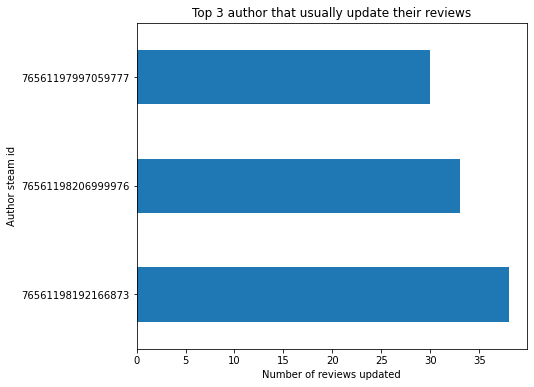

In [84]:
ax = top3_author.plot(kind = "barh", title = "Top 3 author that usually update their reviews", figsize=(7, 6))
ax.set_ylabel("Author steam id")
ax.set_xlabel("Number of reviews updated")
plt.show()